# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2018-2019 учебный год

Лектор: Илья Щуров

Семинаристы: Евгения Ческидова, Евгений Ковалев

# Семинар 4

Сегодня мы узнаем

* Что такое «проклятие размерности» и почему kNN не является самым лучшим алгоритмом машинного обучения
* Почему утверждение о том, что «точность больше 90%» не говорит ничего
* Как работать с категориальными данными
* Почему масштаб имеет значение

## Проклятие размерности

In [1]:
import numpy as np

In [2]:
def mkdata(n, k):
    X = np.random.uniform(low=-1, high=1, size=(n, k))
    y = np.linalg.norm(X, axis=1) ** 2
    return X, y

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

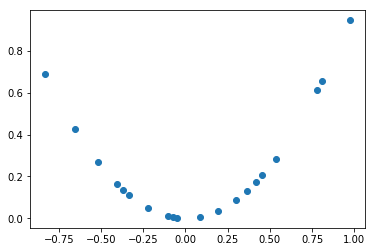

In [4]:
X, y = mkdata(20, 1)
plt.plot(X[:, 0], y, 'o')

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [6]:
def knn_mse(n, k):
    X_train, y_train = mkdata(n, k)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    X_test, y_test = mkdata(10000, k)
    return mean_squared_error(knn.predict(X_test), y_test)

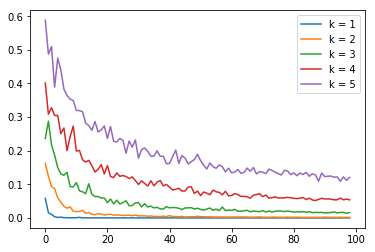

In [7]:
for k in range(1, 6):
    plt.plot([knn_mse(10 * n_, k) for n_ in range(1, 100)], label=f"k = {k}")
plt.legend()

In [16]:
# как зависит количество данных, необходимых для получения заданной точности, от размерности?
# попробуйте подобрать так n, чтобы knn_mse(n, k) было меньше 0.01 для различных k от 1 до 5
# какой наблюдается характер роста? Объясните его

In [15]:
knn_mse(100, 1)

0.00043845607340945244

## Преобразование данных

In [17]:
import pandas as pd

In [18]:
# Dua, D. and Karra Taniskidou, E. (2017). 
# UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. 
# Irvine, CA: University of California, 
# School of Information and Computer Science.
# See also https://www.openml.org/d/31

df = pd.read_csv("data/dataset_31_credit-g.csv")

In [19]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
X = df.drop('class', axis=1)
y = df['class']

In [22]:
knn = KNeighborsClassifier()
knn.fit(X, y)

ValueError: could not convert string to float: 'yes'

In [23]:
# Ой

In [24]:
df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [25]:
df.select_dtypes(exclude=['object']).head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


In [26]:
X = df.select_dtypes(exclude=['object'])
y = df['class']
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=7, shuffle=True)
cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

array([0.63636364, 0.65734266, 0.68531469, 0.63636364, 0.61538462,
       0.54545455, 0.65492958])

In [33]:
# что будет, если увеличить число соседей? Попробуйте! (Менять от 5 до 200)

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
kf = StratifiedKFold(n_splits=7, shuffle=True)
cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean()

0.7000042211309817

In [40]:
# Хороши ли наши предсказания? Ой как хороши!

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=200, p=2,
           weights='uniform')

In [43]:
knn.predict(X_test)

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

In [44]:
# Ой

In [45]:
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [46]:
categoricals = df.select_dtypes(include=['object']).columns
numerics = df.select_dtypes(include=['object']).columns

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
encoder = LabelEncoder()
encoder.fit(df['checking_status'])

LabelEncoder()

In [49]:
encoder.classes_

array(['0<=X<200', '<0', '>=200', 'no checking'], dtype=object)

In [50]:
encoder.transform(df['checking_status'])[:10]

array([1, 0, 3, 1, 1, 3, 3, 0, 3, 0])

In [51]:
encoder.inverse_transform(2)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'>=200'

In [52]:
encoder.fit_transform(df['checking_status'])[:10]

array([1, 0, 3, 1, 1, 3, 3, 0, 3, 0])

In [53]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit_transform(df['checking_status'])

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [54]:
df_encoded = df.copy()
for column in categoricals:
    encoder = LabelEncoder()
    df_encoded[column] = encoder.fit_transform(df[column])

In [55]:
df_encoded.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,6,1169,4,3,4,3,2,...,3,67,1,1,2,1,1,1,1,1
1,0,48,3,6,5951,2,0,2,0,2,...,3,22,1,1,1,1,1,0,1,0
2,3,12,1,2,2096,2,1,2,3,2,...,3,49,1,1,1,3,2,0,1,1
3,1,42,3,3,7882,2,1,2,3,1,...,1,45,1,0,1,1,2,0,1,1
4,1,24,2,4,4870,2,0,3,3,2,...,2,53,1,0,2,1,2,0,1,0


In [56]:
X = df_encoded.drop('class', axis=1)
y = df['class']

kf = StratifiedKFold(n_splits=7, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
scores.mean()

0.6600019698611247

In [57]:
# what's the problem?

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_encoded.drop('class', axis=1))
y = df['class']
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
scores.mean()

0.7160023075516034

In [60]:
# now it's better than "all good" algorithm!
# can you make it better?